<a href="https://colab.research.google.com/github/Nelson-Muteti/Regression-Project/blob/main/Nelson_Muteti_Week_7_Regression_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining The Question

As a Data Scientist,I  work for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, I am supposed to create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import seaborn as sns

## Defining Metrics for Success
A succesful project will build several regression models, evaluate their metrics for accuracy using the R squared and Root Mean Squared Error. The best predictive model would be the model with the Highest R squared and lowest RMSE.

## Understanding The context.
The context in this case is a real estate one. We have to understand what factors  consumers look into when making a house buying / purchasing decsision. For this, we have to engage with the data and explore it in depth.

## Experimental Design
I will first clean the data and remove any outliers and null values that may skew our model. We then conduct a thorough EDA and get any relationships in the data. Afterwards, we will build the different regression models and compare their RMSEs before selecting the model with the least RMSE.

## Reading the Data

In [273]:
#lets read the data into a pandas dataframe
df = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [274]:
df.shape
#check the make of data

(21613, 20)

In [275]:
df.info()
#check the additional information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [276]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))
#describe dataset without exponential terms

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,4580301520.86499,540182.15879,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,84.40226,98077.93980,47.56005,-122.21390,1986.55249,12768.45565
std,2876565571.31205,367362.23172,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,401.67924,53.50503,0.13856,0.14083,685.39130,27304.17963
min,1000102.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049194.00000,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000
75%,7308900445.00000,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


## External Data Validation
We check for data integrity to ensure that the data conforms with what is expected . For this,I used  [real estate data from datarade.ai](https://datarade.ai/data-categories/real-estate-data)

## Data Cleaning

In [277]:
df.isnull().sum()
#check for null values in data

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [278]:
#some cleaning
df.drop(['id','lat','long'],axis=1,inplace=True)

In [279]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639


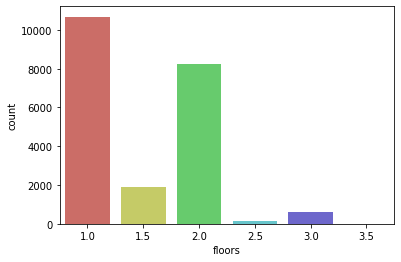

In [280]:
sns.countplot(x = 'floors',palette='hls',data = df)
#some countplots to check the number of values within each column of datasets.

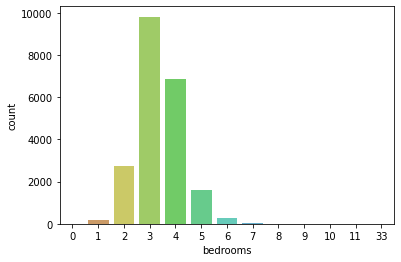

In [281]:
sns.countplot(x = 'bedrooms',palette='hls',data = df)

In [282]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

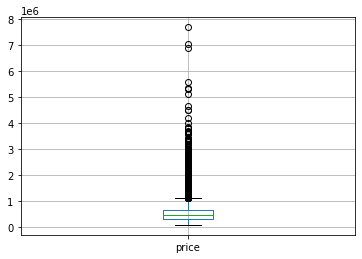

In [283]:
df.boxplot(column = 'price')
#there seems to be outliers in this column

In [284]:
#remove the outliers
#removing the outliers and anomalies in dataset
#Get the Interquartile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
newdf = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(newdf.shape)
print(df.shape)

(15068, 17)
(21613, 17)


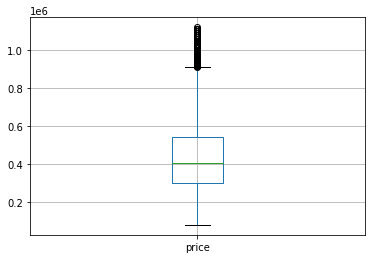

In [285]:
newdf.boxplot(column = 'price')
#now the outliers are removed

In [286]:
newdf.to_csv('Housing_data.csv')
#store the clean data in a csv file for future reference

## Exploratory Data Analysis

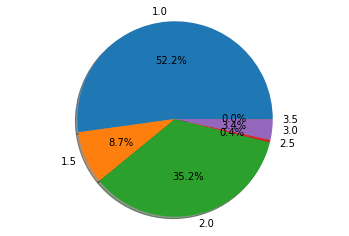

In [287]:
#lets do some EDA
#Univariate exploratory Data Analysis
labels = newdf['floors'].astype('category').cat.categories.tolist()
counts = newdf['floors'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) 
ax1.axis('equal')
plt.show()
#about 52.2% of houses in the data have only 1 floor
#while about 0.4% have 2.5 floors

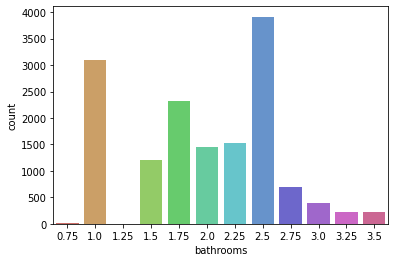

In [288]:
sns.countplot(x = 'bathrooms',palette='hls',data = newdf)
#most of the houses in the dataset have about 2.5 bathrooms
#very few have above 3 bathrooms.

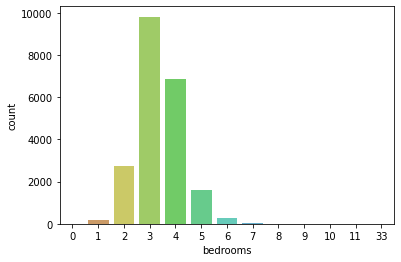

In [289]:
sns.countplot(x = 'bedrooms',palette='hls',data = df)
#most of the houses in the dataset have about 3 bedrooms while
#very few have above 5 bedrooms

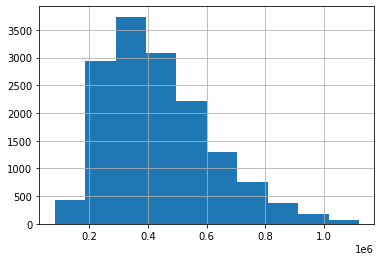

In [290]:
#check distribution of prices 
newdf['price'].hist()


In [291]:
#checking the skewness of prices from the data
#The positive value means the distribution of house prices  is positively skewed.
newdf['price'].skew()

0.837128986123086

In [292]:
# Finding the min and max values of the house prices
max_price = newdf['price'].max()
min_price = newdf['price'].min()
print('Maximum is ',max_price)
print('Minimum is ',min_price)
# Calculating the range of house prices
print('Range of prices is ',max_price - min_price)

#maximum house price is 1.12 Million dollars while minimum price is 82,000 dollars

Maximum is  1120000.0
Minimum is  82000.0
Range of prices is  1038000.0


In [293]:
newdf['price'].describe().apply(lambda x: format(x, 'f'))
#get summary statistics from target variable

count      15068.000000
mean      437667.164720
std       179667.117352
min        82000.000000
25%       300000.000000
50%       405000.000000
75%       545000.000000
max      1120000.000000
Name: price, dtype: object

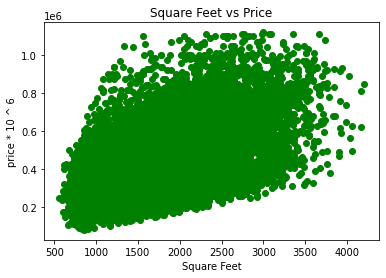

0.5154274900555973


In [294]:
#now for some bivariate EDA
#plot relationship between house price and  square feet of  house
plt.scatter(newdf['sqft_living'],newdf['price'],color = 'green')
plt.title('Square Feet vs Price')
plt.xlabel('Square Feet')
plt.ylabel('price * 10 ^ 6')
plt.show()

coef = newdf['sqft_living'].corr(newdf['price'])
print(coef)
#relatively moderate correlation between house price and square footage

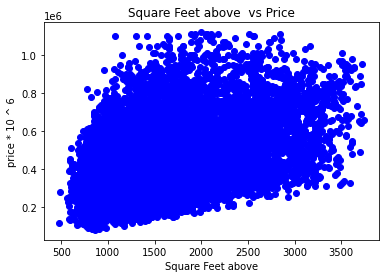

0.4087938392472363


In [295]:
#plot relationship between house price and  square feet of  house
plt.scatter(newdf['sqft_above'],newdf['price'],color = 'blue')
plt.title('Square Feet above  vs Price')
plt.xlabel('Square Feet above')
plt.ylabel('price * 10 ^ 6')
plt.show()

coef = newdf['sqft_above'].corr(newdf['price'])
print(coef)
#relatively weak to moderate correlation between house price and square footage above the house

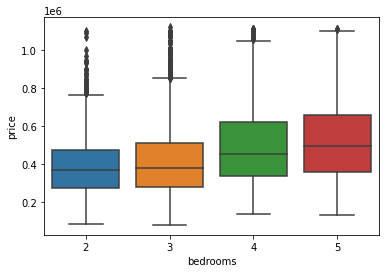

In [296]:
#plot the box plot of prices by no. of bedrooms
sns.boxplot(newdf['bedrooms'], newdf['price'])
plt.show()
#as the number of bedrooms increase, the median houseprice seems to increase

zipcode
98039    900833.333333
98004    819185.165289
98040    805175.509804
98112    726125.782946
98005    695038.295918
98109    681485.000000
98102    676693.561644
98119    664673.727273
98075    659035.230769
98105    631160.734694
Name: price, dtype: float64


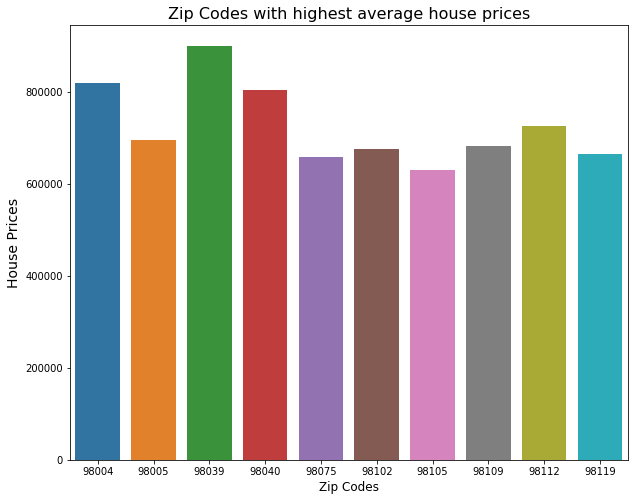

In [297]:
new_df = newdf.groupby('zipcode')['price'].mean()
new_df = new_df.sort_values(ascending=False)
new_df = new_df.head(10)
plt.figure(figsize= (10,8))
sns.barplot(x = new_df.index, y = new_df.values)
plt.title('Zip Codes with highest average house prices', fontsize = 16)
plt.ylabel('House Prices', fontsize=14)
plt.xlabel('Zip Codes', fontsize=12)
print(new_df)
plt.show()


#checking the zipcodes with the highest average house prices.

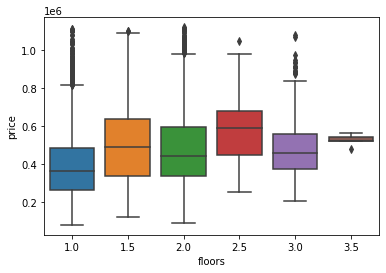

In [298]:
#plot the box plot of price bt no. of floors
sns.boxplot(newdf['floors'], newdf['price'])
plt.show()


## Investigate Multicollinearity

In [299]:
#check for mutlicollinearity 
independent_only = newdf.drop(columns=['price'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations
#the columns square foot above and square foot living are strongly correlated
#we have to drop one of the columns

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
bedrooms,1.000000,0.444362,0.614892,0.200711,0.130887,NaN,NaN,0.028786,0.291225,0.486672,0.241196,0.160286,NaN,-0.188022,0.414712,0.191379
bathrooms,0.444362,1.000000,0.670040,-0.089191,0.525661,NaN,NaN,-0.158169,0.585230,0.593916,0.154285,0.603797,NaN,-0.248937,0.517089,-0.092565
sqft_living,0.614892,0.670040,1.000000,0.158914,0.320174,NaN,NaN,-0.069356,0.623327,0.832158,0.322821,0.352167,NaN,-0.237880,0.728358,0.143435
sqft_lot,0.200711,-0.089191,0.158914,1.000000,-0.414294,NaN,NaN,0.147325,-0.034580,0.111188,0.087233,-0.103415,NaN,-0.260664,0.192427,0.883064
floors,0.130887,0.525661,0.320174,-0.414294,1.000000,NaN,NaN,-0.301813,0.473523,0.520042,-0.329485,0.551709,NaN,-0.059525,0.258378,-0.421601
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.028786,-0.158169,-0.069356,0.147325,-0.301813,NaN,NaN,1.000000,-0.190001,-0.189868,0.203161,-0.405417,NaN,0.003367,-0.132838,0.148337
grade,0.291225,0.585230,0.623327,-0.034580,0.473523,NaN,NaN,-0.190001,1.000000,0.638235,-0.002783,0.509271,NaN,-0.213061,0.605391,-0.026425
sqft_above,0.486672,0.593916,0.832158,0.111188,0.520042,NaN,NaN,-0.189868,0.638235,1.000000,-0.256210,0.474639,NaN,-0.306843,0.711731,0.097848


In [300]:
newdf.drop(['sqft_above','sqft_lot15'],axis=1,inplace=True)
#dropping highly multicollinear columns

In [301]:
newdf.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'sqft_living15'],
      dtype='object')

In [302]:
#check for mutlicollinearity 
mycorre = newdf.drop(columns=['price'])

# Let's display the correlations between the variables
corrs = mycorre.corr()

corrs

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15
bedrooms,1.000000,0.444362,0.614892,0.200711,0.130887,NaN,NaN,0.028786,0.291225,0.241196,0.160286,NaN,-0.188022,0.414712
bathrooms,0.444362,1.000000,0.670040,-0.089191,0.525661,NaN,NaN,-0.158169,0.585230,0.154285,0.603797,NaN,-0.248937,0.517089
sqft_living,0.614892,0.670040,1.000000,0.158914,0.320174,NaN,NaN,-0.069356,0.623327,0.322821,0.352167,NaN,-0.237880,0.728358
sqft_lot,0.200711,-0.089191,0.158914,1.000000,-0.414294,NaN,NaN,0.147325,-0.034580,0.087233,-0.103415,NaN,-0.260664,0.192427
floors,0.130887,0.525661,0.320174,-0.414294,1.000000,NaN,NaN,-0.301813,0.473523,-0.329485,0.551709,NaN,-0.059525,0.258378
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.028786,-0.158169,-0.069356,0.147325,-0.301813,NaN,NaN,1.000000,-0.190001,0.203161,-0.405417,NaN,0.003367,-0.132838
grade,0.291225,0.585230,0.623327,-0.034580,0.473523,NaN,NaN,-0.190001,1.000000,-0.002783,0.509271,NaN,-0.213061,0.605391
sqft_basement,0.241196,0.154285,0.322821,0.087233,-0.329485,NaN,NaN,0.203161,-0.002783,1.000000,-0.196226,NaN,0.109055,0.054859


In [303]:
newdf.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'sqft_living15'],
      dtype='object')

In [304]:
mydf = newdf

# Implementing The Solution

## Bartlett's Test and Mutlivariate Linear Regression
Check for homoskedasticity in the data by plotting a residual plot and using the chisquare test to prove an hypothesis

Also, **Fit a Multivariate Linear Regression** and check its accuracy metrics

In [305]:
#use bartletts test for Homoskedasticity
#fitting a linear Regression Model in order to Check for Homoskedasticity
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = newdf[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built','yr_renovated', 'zipcode', 'sqft_living15']].values
y = newdf['price'].values

#first standardise the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for home goals based on our model
y_pred = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

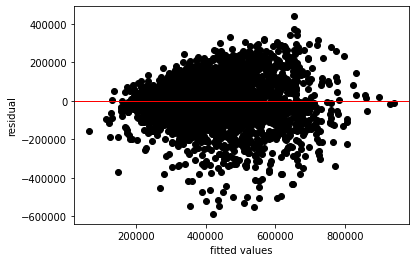

In [306]:
#plot a residual plots
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [307]:
import scipy as sp

test_statistic, p_value = sp.stats.bartlett(y_pred, residuals)
print('Test statistic is :',test_statistic)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('Critical Value is :',critical_value)

# If the test_statistic is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_statistic > critical_value):
  print('\nThe variances are unequal, and the model should be reassessed')
else:
  print('\nThe variances are homogeneous!')


Test statistic is : 1.260760719824982
Critical Value is : 3062.1803126704976

The variances are homogeneous!


In [308]:
#check a simple dataframe to see how the linear regression model performs
my_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
my_frame.head(10)
#a quick look shows the model may be way off the mark

,Actual,Predicted
0,224000.0,65698.823025
1,385000.0,494709.791816
2,320000.0,449649.963650
3,365500.0,370102.474646
4,345000.0,349894.358903
5,689000.0,559852.680973
6,670000.0,578868.999305
7,325000.0,496082.007509
8,747000.0,506108.402424
9,207000.0,176164.439083


**Check the RMSE and R squared for Multivariate Linear Regression**

In [309]:
#get the root MSE and R squared value for Multivariate Linear Regression
print('MSE is : ',np.sqrt(mean_squared_error(y_test,y_pred))) 
print('R Squared is : ',regressor.score(X,y))

MSE is :  129449.43859661819
R Squared is :  0.5018258354846897


The Multivariate Linear Regression has an RMSE less than the average price of the house. Therefore ,the model is a moderately good estimator. Also, about 50% of the variances in house prices can be explained by the independent variables. We will investigate how the RMSE changes with other Regression models.

## Ridge Regression

In [310]:
#now, build a Ridge Regression Model and measure the accuracy
#first get the appropriate alpha value
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [311]:
#find the best alpha value
search.fit(X,y)
search.best_params_

{'alpha': 0.01}

Now that we have the alpha value as 0.01, lets fit it into our ridge regression model.

In [312]:
#the alpha value is 0.01
ridge_regressor = Ridge(alpha=0.01)
ridge_regressor.fit(X_train, y_train) 

pred_test_rr= ridge_regressor.predict(X_test)
print('MSE is : ',np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R Squared is : ',ridge_regressor.score(X,y))

#there is not much of a change compared to the Linear Regression Metrics.

MSE is :  129449.4382615594
R Squared is :  0.5018258360217256


The ridge regression performed almost the same as the Linear Regression. This can be attributed to the fact that ridge regression does not eliminate some predictor variables and thus some noise may still be present in the model. This ultimately led to a case of high Variance (Overfitting) as the ridge regression model learnt the noise in the data.

## Lasso Regression

In [313]:
#now using Lasso regression to build a model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train)  
print("lasso best parameters:", gridlasso.best_params_) 

lasso best parameters: {'alpha': 19.0}


Lets fit the alpha value acquired as 19.0

In [314]:
#now that we have an alpha value of 19, lets include it in the model
#and build a lasso Regression Model
gridlasso = Lasso(alpha=19)
gridlasso.fit(X_train, y_train)

pred_test_lasso= gridlasso.predict(X_test)
print('MSE is : ',np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R Squared is : ',gridlasso.score(X,y))

#the r squared for this model is relatively higher compared to the Ridge and Linear Regressions

MSE is :  127883.96839966976
R Squared is :  0.5018111043397078


Lets check the variables that were not important in predictive modelling. These include the **view, waterfront and year of renovation.**

In [315]:
#now check the lasso coefficients and determine which features were important in the data
gridlasso.coef_
#the view, waterfront and year renovated columns were not important for predictive modelling

array([-13335.44586723,  11002.43545406,  46663.72730741, -25878.15803868,
        16627.23192608,      0.        ,      0.        ,  14964.50665497,
        78259.28248602,  11418.28864685, -75706.29905212,      0.        ,
         4070.54608199,  30712.24954175])

The Lasso regression has by far the best RMSE as compared to the Ridge and Linear Regressions. This could be attributed to the fact that some noise was removed when some variable coeffcients were reduced to zero. This means that a bias was introduced and L1 Regularisation applied leading to only the important predictor variables being used for modelling.

A disadvantage for Lasso regression would have been underfitting since a higher bias was introduced to the less significant predictor variables

## Elastic Net Regression

In [316]:
#now to build an elastic net Regression Model on the data
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [317]:
#get the optimum alpha and l1_ratio values
search.fit(X,y)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

Now that we have the **alpha and l1_ratio values**, lets fit the elastic net regression model into the train data and predict the prices of houses.

In [318]:
#fit these values in the net elastic regression model
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)
net_model = np.sqrt(mean_squared_error(y_test,y_pred))
print('R Squared is : ',elastic.score(X,y))
print('RMSE is : ',net_model)

#the r squared is about 50 %
#This is a moderate value and more can be done to increase it.

R Squared is :  0.5012874306874089
RMSE is :  127985.76606655831


In [319]:
#check the coeffcients of the model
elastic.coef_
#the view, waterfront and Year of renovation columns did not cotribute much to house prices

array([-12099.5003874 ,  10394.10121381,  45191.30042324, -25181.14600934,
        16392.64322938,      0.        ,      0.        ,  15402.57150743,
        75304.87855534,  11939.67503474, -71373.31093546,      0.        ,
         4873.58977355,  31314.99813835])

The elastic net regression performed worse than the Lasso regression This is probably because the effect of some variables were removed from the predictive model.

The removal of these variables would have led to underfitting just as in Lasso regression and thus reduced our predictive accuracy metrics.

## Quantile Regression

Now lets investigate the effect of house prices on different quantiles across the predictor variables

In [320]:
x = mydf[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built','yr_renovated', 'zipcode', 'sqft_living15']]
y = mydf['price']

In [321]:
import statsmodels.formula.api as smf
mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_basement ', data=mydf)
res = mod.fit(q=0.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.1624
Model:                       QuantReg   Bandwidth:                   2.977e+04
Method:                 Least Squares   Sparsity:                    4.084e+05
Date:                Fri, 16 Apr 2021   No. Observations:                15068
Time:                        11:05:09   Df Residuals:                    15061
                                        Df Model:                            6
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        2.7e+05   9467.199     28.522      0.000    2.51e+05    2.89e+05
bedrooms      -3.234e+04   2778.846    -11.637      0.000   -3.78e+04   -2.69e+04
bathrooms     -2.293e+04   3945.186     -5.812      0.000   -3.07e+04   -1.52e+04
sqft_living     190.0834      4.520  

In [322]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['sqft_living']] + \
            res.conf_int().loc['sqft_living'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('price ~ sqft_living', mydf).fit()
ols_ci = ols.conf_int().loc['sqft_living'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['sqft_living'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

#quantile coefficients for house prices against Square Feet of Living Space

      q              a           b          lb          ub
0  0.05   81736.238521   80.689861   75.270005   86.109717
1  0.15  142723.738643   96.071366   91.415688  100.727045
2  0.25  187627.301784  122.305802  116.542719  128.068885
3  0.35  226522.920349  153.874994  146.692512  161.057476
4  0.45  256242.994505  181.303118  172.944492  189.661744
5  0.55  280860.664631  203.012122  194.019156  212.005088
6  0.65  298207.205463  215.033056  206.125967  223.940145
7  0.75  325887.597671  224.719426  216.025461  233.413391
8  0.85  353118.135432  239.151589  228.571762  249.731415
9  0.95  428362.115459  272.788195  256.662221  288.914169
{'a': 164327.1481516499, 'b': 150.71871716709785, 'lb': 146.71714568618023, 'ub': 154.72028864801547}


Text(0.5, 1.0, 'House prices vs square feet per quantile')

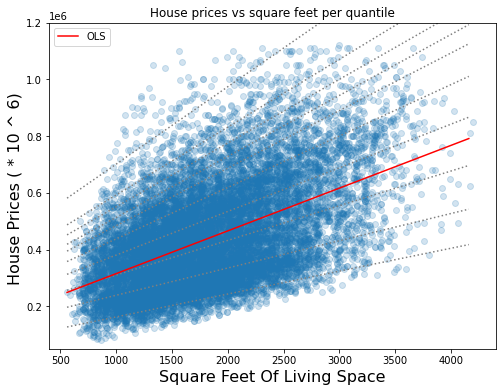

In [323]:
x = np.arange(mydf.sqft_living.min(), mydf.sqft_living.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(mydf.sqft_living, mydf.price, alpha=.2)
ax.set_xlim((400, 4400))
ax.set_ylim((50000,1200000))
legend = ax.legend()
ax.set_xlabel('Square Feet Of Living Space', fontsize=16)
ax.set_ylabel('House Prices ( * 10 ^ 6) ', fontsize=16);
ax.set_title('House prices vs square feet per quantile')
#The dispersion of House prices increases with increase in square feet of living space

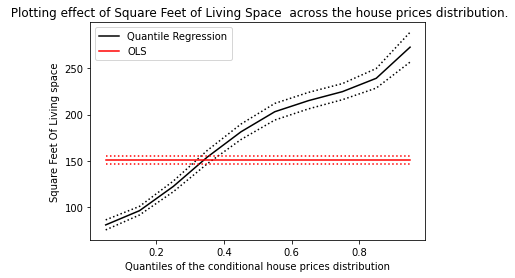

In [324]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Regression')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel('Square Feet Of Living space')
plt.xlabel('Quantiles of the conditional house prices distribution')
plt.title(' Plotting effect of Square Feet of Living Space  across the house prices distribution.')
plt.legend()
plt.show()
#most of the quantiles of house price fall outside the OLS line meaning that the effect of square feet is different
#across different quantiles of prices.

#The dotted black lines form 95% point-wise confidence band around 10 quantile regression estimates (solid black line). 
#The red lines represent OLS regression results along with their 95% confidence interval.

In [325]:
#now lets investigate the quantiles of house prices with respect to floors
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['floors']] + \
            res.conf_int().loc['floors'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('price ~ floors', mydf).fit()
ols_ci = ols.conf_int().loc['floors'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['floors'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

#quantile coefficients for house prices against no. of floors

      q              a             b            lb            ub
0  0.05   81736.238521  24248.124235  18969.814577  29526.433893
1  0.15  142723.738643  24684.095275  19934.581535  29433.609014
2  0.25  187627.301784  22940.211326  16906.100836  28974.321816
3  0.35  226522.920349  19432.357288  11967.829303  26896.885274
4  0.45  256242.994505  14128.436023   5389.387139  22867.484907
5  0.55  280860.664631   4652.359219  -4870.473879  14175.192318
6  0.65  298207.205463    307.934475  -9300.223219   9916.092169
7  0.75  325887.597671    461.747276  -9168.169635  10091.664187
8  0.85  353118.135432  -1086.311095 -13275.920438  11103.298247
9  0.95  428362.115459 -23843.159167 -43663.798739  -4022.519594
{'a': 327095.82951021264, 'b': 75165.86041100472, 'lb': 70063.05176964364, 'ub': 80268.66905236579}


In [326]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['sqft_basement']] + \
            res.conf_int().loc['sqft_basement'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('price ~ sqft_basement', mydf).fit()
ols_ci = ols.conf_int().loc['sqft_basement'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['sqft_basement'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

#coefficients for square feet for basement vs house price per quantile

      q              a          b         lb         ub
0  0.05   81736.238521   9.709085   1.938248  17.479923
1  0.15  142723.738643  26.379845  19.810002  32.949688
2  0.25  187627.301784  46.731096  38.709455  54.752736
3  0.35  226522.920349  58.525247  48.838279  68.212214
4  0.45  256242.994505  60.559402  49.436991  71.681812
5  0.55  280860.664631  34.537877  22.721136  46.354618
6  0.65  298207.205463  24.016482  12.423180  35.609785
7  0.75  325887.597671  26.492273  15.198888  37.785658
8  0.85  353118.135432  26.056361  12.198718  39.914004
9  0.95  428362.115459 -15.103304 -37.364098   7.157491
{'a': 414378.2674203445, 'b': 102.3177692461152, 'lb': 94.3437488031373, 'ub': 110.29178968909311}


Text(0.5, 1.0, 'House prices vs square feet of Basement per quantile')

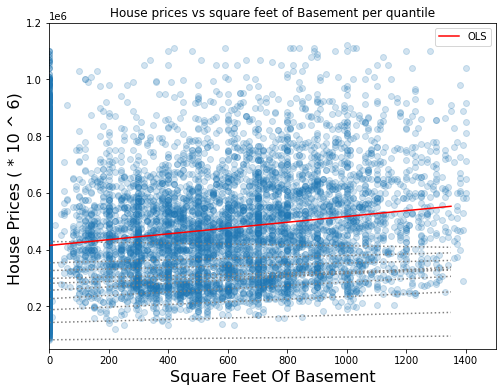

In [327]:
x = np.arange(mydf.sqft_basement.min(), mydf.sqft_basement.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(mydf.sqft_basement, mydf.price, alpha=.2)
ax.set_xlim((0, 1500))
ax.set_ylim((50000,1200000))
legend = ax.legend()
ax.set_xlabel('Square Feet Of Basement', fontsize=16)
ax.set_ylabel('House Prices ( * 10 ^ 6) ', fontsize=16);
ax.set_title('House prices vs square feet of Basement per quantile')


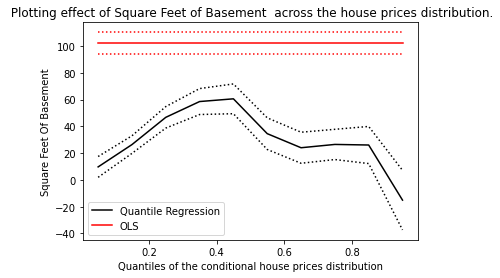

In [328]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Regression')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel('Square Feet Of Basement')
plt.xlabel('Quantiles of the conditional house prices distribution')
plt.title(' Plotting effect of Square Feet of Basement  across the house prices distribution.')
plt.legend()
plt.show()
#all the quantiles of house prices fall outside the OLS regression line
#from about the 0.5 quantile, the unit price of houses falls with an increament in basement square feet space

The quantile regression model is important for deeper investigation into the prices at different quantiles since the measure parameter is the medians. However, the disadvantage is that parameters are harder to estimate as compared to a Generalised Linear Model.

## Recommendations and Challenging the solution



### Recommendations
For this case, the best model to use would be the **Lasso Regression** model since it offered the best Root Mean Squared Error while providing the best R squared value. Also, feature extraction was done and the less important predictor variables were eliminated ensuring there was no overfitting.

### Challenging the Solution
A glossary on the data would have certainly helped in discovering what some values meant and in turn enable us to tune the models. 

K fold cross validation may have better trained the data as opposed to the train_test_split leading to better metrics.
